In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [51]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [52]:
df = pd.read_csv("/content/BostonHousing.csv")

In [53]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


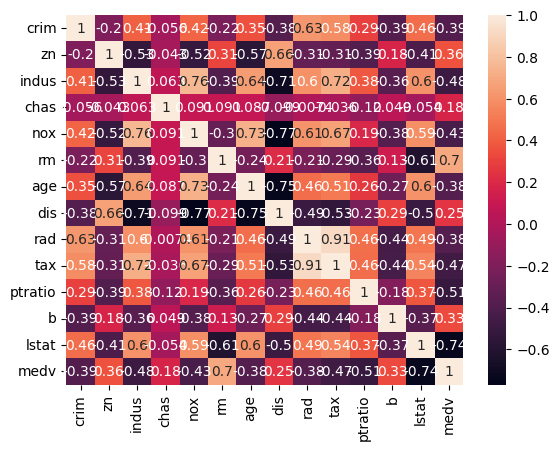

In [54]:
plt.Figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [55]:
X = df.drop('medv', axis=1)
y = df['medv']

In [56]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 29 Sep 2025   Prob (F-statistic):          6.72e-135
Time:                        17:50:00   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
b              0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
variance_inflation_factor(df.iloc[:,:],2)

np.float64(14.485874343285056)

In [63]:
df.shape[1]

14

In [64]:
for i in range(df.shape[1]):
  print(variance_inflation_factor(df.iloc[:,:],i))

2.1314042398916406
2.9100040831335887
14.485874343285056
1.176265953292883
74.00426852716569
136.1017425464841
21.39886253165994
15.430455486916713
15.36997984977581
61.93971317434026
87.22723281176584
21.35101506934191
12.615187641345367
24.503206285254794


In [69]:
A = df.iloc[:,[0,1]]
b = df.iloc[:,[3]]

In [70]:
X = sm.add_constant(A)
model = sm.OLS(b, A).fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   chas   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              2.243
Date:                Mon, 29 Sep 2025   Prob (F-statistic):                       0.107
Time:                        18:26:39   Log-Likelihood:                         -39.930
No. Observations:                 506   AIC:                                      83.86
Df Residuals:                     504   BIC:                                      92.31
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim           0.0015      0.001      1.171      0.242      -0.001       0.004
zn             0.0008      0.000      1.760      0.079   -9.19e-05       0.002
==============================================================================
Omnibus:                      363.866   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2814.610
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      12.398   Cond. No.                         2.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""